# Clustering method of unsupervised learning

In [ ]:
"""It is unsupervised lerning method.
Observations are grouped together based on similarity in variables.
A good cluster is the one which have less variance within it and more variance between other clusters."""

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#[Dataset]
#https://www.kaggle.com/uciml/student-alcohol-consumption/version/1

In [3]:
data = pd.read_csv('student-por.csv', sep=';')

In [4]:
#data.head()

In [5]:
#data.info()

In [6]:
data.columns = map(str.upper, data.columns)

In [7]:
data.columns

Index(['SCHOOL', 'SEX', 'AGE', 'ADDRESS', 'FAMSIZE', 'PSTATUS', 'MEDU', 'FEDU',
       'MJOB', 'FJOB', 'REASON', 'GUARDIAN', 'TRAVELTIME', 'STUDYTIME',
       'FAILURES', 'SCHOOLSUP', 'FAMSUP', 'PAID', 'ACTIVITIES', 'NURSERY',
       'HIGHER', 'INTERNET', 'ROMANTIC', 'FAMREL', 'FREETIME', 'GOOUT', 'DALC',
       'WALC', 'HEALTH', 'ABSENCES', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
data = data.dropna()

In [9]:
data.head()

,SCHOOL,SEX,AGE,ADDRESS,FAMSIZE,PSTATUS,MEDU,FEDU,MJOB,FJOB,...,FAMREL,FREETIME,GOOUT,DALC,WALC,HEALTH,ABSENCES,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [11]:
# consider following clustering variables
cluster = data[['AGE', 'PSTATUS','GUARDIAN','FAILURES', 'FAMREL', 'DALC',
       'WALC', 'HEALTH']].dropna()
#cluster

### Standarized variables

In [12]:
# Standardize features to have mean=0, and standard deviation sd=1
# Take each feature and apply scale method on them to standardize features.
# Need - If variables are of incomparable units (e.g. height in cm and weight in kg) then standardize
# variables so that they have same unit. Also, K-means cannot handle categorical data directly so one of
# the possible solution is replace categorical variable with arithmatic sequence (integer).

In [13]:
# AGE is integer; converting to float
cluster['AGE'] = preprocessing.scale(cluster['AGE'].astype('float'))

In [14]:
# PSTATUS is string type categorical data hence replace with float
#print(cluster['PSTATUS'].unique())
parental_status = cluster['PSTATUS'].replace(('A', 'T'),(1, 2))
cluster['PSTATUS'] = parental_status

In [15]:
cluster['PSTATUS'] = preprocessing.scale(cluster['PSTATUS'].astype('float'))

In [16]:
# GUARDIAN is categorical string hence represent in numeric
#print(cluster.GUARDIAN.unique())
guardian = cluster['GUARDIAN'].replace(('mother', 'father', 'other'), (1,2,3))
cluster['GUARDIAN'] = guardian

In [17]:
cluster['GUARDIAN'] = preprocessing.scale(cluster['GUARDIAN'].astype('float'))

In [18]:
cluster['FAILURES'] = preprocessing.scale(cluster['FAILURES'].astype('float'))

In [19]:
cluster['FAMREL'] = preprocessing.scale(cluster['FAMREL'].astype('float'))

In [20]:
cluster['DALC'] = preprocessing.scale(cluster['DALC'].astype('float'))

In [21]:
cluster['WALC'] = preprocessing.scale(cluster['WALC'].astype('float'))

In [22]:
cluster['HEALTH'] = preprocessing.scale(cluster['HEALTH'].astype('float'))

### Now variables are standarized; calculate average distance of observations from cluster centroid.

In [23]:
# k-means cluster analysis for 1 to 10 clusters

In [24]:
cluster_train, cluster_test = train_test_split(cluster, test_size=0.3, random_state=23)

In [25]:
clusters =range(1,11)
mean_dist = []

In [26]:
# To compute euclidean distance
from scipy.spatial.distance import cdist

In [27]:
for k in clusters:
    #create model for each cluster
    model = KMeans(n_clusters=k) #n_clusters is attribute for number of clusters
    model.fit(cluster_train)
    #compute euclidean distances, which is distance between each observation and cluster centroid
    #take those minimum distances across all observation and add them up and get average distance
    mean_dist.append(sum(np.min(cdist(cluster_train, model.cluster_centers_, 
                                      'euclidean'),axis=1))/cluster_train.shape[0])
    #cluster_train.shape[0] is number of samples in training datasets
    

### Plot elbow curve

Text(0, 0.5, 'Average distance k')

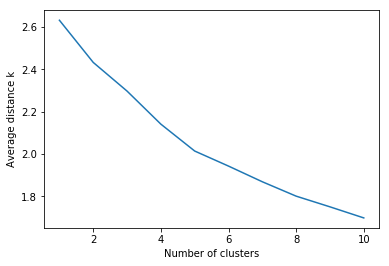

In [28]:
plt.plot(clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance k')

In [29]:
# AS number of clusters increases, avg distance decreases. Selecting fewest number of clusters which minimize 
# avg distance should be goal of k-means analysis.
# Bend in curve says how many clusters to be consider which minimize avg distance; for example there is a 
# bend at k=2 and k=5. For k=5 avg distance minimize to a value beyond k=5 rate of decreasing of distance
# gradually low. 

### Canonical discreminate analysis

In [30]:
# To plot 11 clusters in scatter plot we need 11 dimensions; which is not feasile; to overcome this drawback
#use canonical discreminate analysis.
# Canonical discreminate analysis is data reduction technique which creates smaller number of variables
#that are linear combinations of 11 clustreing variables. 
# First canonical variable is larget proportion of cluster variance, second canon variable is next 
#larget proportion variance and so on.

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca_2 = PCA(2) # use first two canonical variables for plot

Text(0.5, 1.0, 'Scatter plot for 10 clusters solution using 2 can. var')

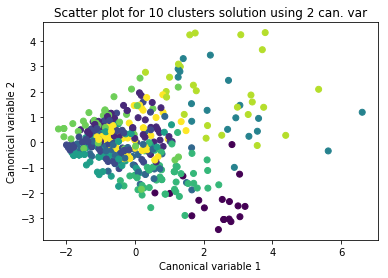

In [33]:
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatter plot for 10 clusters solution using 2 can. var')

### k=3

In [34]:
# If k=3, that is number of clusters are three,
# create KMean model for k=3 
# plot scatter plot

Text(0.5, 1.0, 'Scatter plot for 3 clusters solution using 2 can. var')

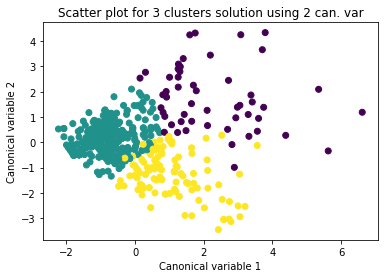

In [35]:
model_2 = KMeans(n_clusters=3)
model_2.fit(cluster_train)
# plot
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model_2.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatter plot for 3 clusters solution using 2 can. var')

In [36]:
# Above plot shows that three clusters are very closly bounded that means very small variance
#in feature variables and variables are very closly related for students.